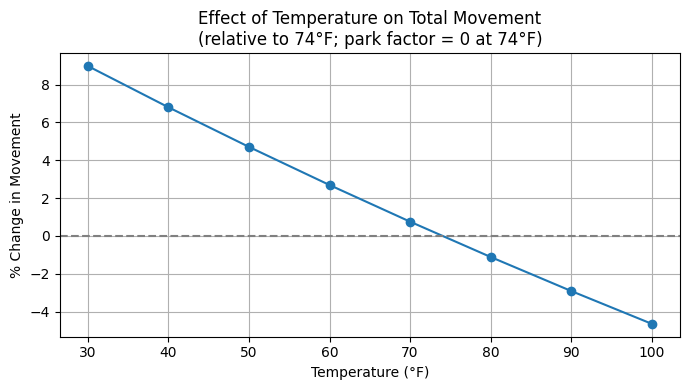

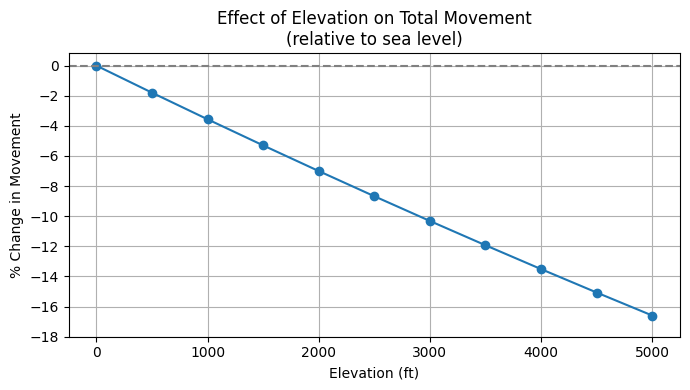

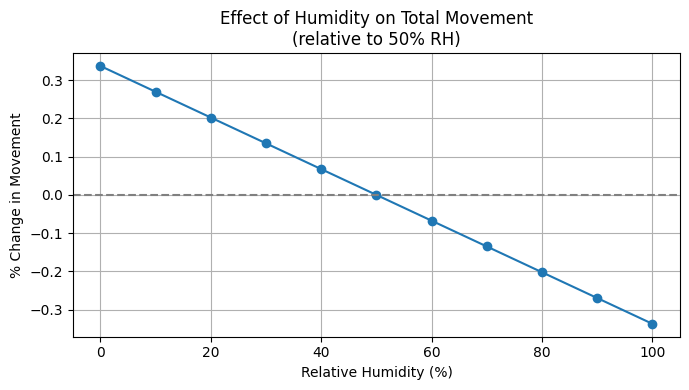

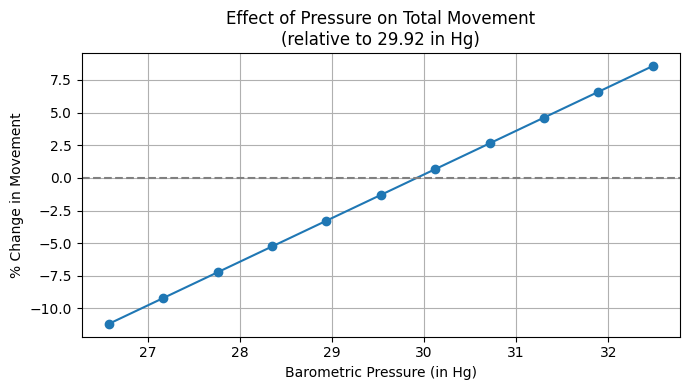

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and baseline definitions
p0 = 101325          # standard pressure at sea level in Pascals
R_air = 287.05       # specific gas constant for dry air, J/(kg*K)
H_m = 8400           # scale height in meters for elevation effect

# -------------------------------
# 1. Temperature Effect (Baseline at 74°F)
# -------------------------------
def density_dry(T, p=p0):
    """Returns the air density (kg/m³) for dry air at temperature T (K) and pressure p (Pa)."""
    return p / (R_air * T)

# Baseline temperature: 74°F
temp_baseline_F = 74.0
temp_baseline_K = (temp_baseline_F - 32) * 5/9 + 273.15  # ~296.48 K
rho_temp_baseline = density_dry(temp_baseline_K)

# Vary temperature from 30°F to 100°F in steps of 10°F.
temps_F = np.arange(30, 101, 10)
temps_K = (temps_F - 32) * 5/9 + 273.15  # convert °F to Kelvin
rho_T = density_dry(temps_K)              # density at each temperature
# % change relative to baseline at 74°F (park factor = 0 at 74°F)
pct_change_T = (rho_T / rho_temp_baseline - 1) * 100

plt.figure(figsize=(7, 4))
plt.plot(temps_F, pct_change_T, marker='o')
plt.xlabel("Temperature (°F)")
plt.ylabel("% Change in Movement")
plt.title("Effect of Temperature on Total Movement\n(relative to 74°F; park factor = 0 at 74°F)")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# 2. Elevation Effect
# -------------------------------
# Use a constant temperature T0 (using the original T0 = 289 K for illustration)
T0 = 289.0           # constant temperature (K) for isolation of elevation effect
rho0_elev = density_dry(T0)

# Vary elevation from 0 to 5000 ft in steps of 500 ft.
elev_ft = np.arange(0, 5001, 500)
elev_m = elev_ft * 0.3048  # convert ft to meters
p_elev = p0 * np.exp(-elev_m / H_m)
rho_elev = p_elev / (R_air * T0)
pct_change_elev = (rho_elev / rho0_elev - 1) * 100

plt.figure(figsize=(7, 4))
plt.plot(elev_ft, pct_change_elev, marker='o')
plt.xlabel("Elevation (ft)")
plt.ylabel("% Change in Movement")
plt.title("Effect of Elevation on Total Movement\n(relative to sea level)")
# Set y-axis ticks every 2%
min_y = np.floor(pct_change_elev.min() / 2) * 2
max_y = np.ceil(pct_change_elev.max() / 2) * 2
plt.yticks(np.arange(min_y, max_y+1, 2))
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# 3. Humidity Effect
# -------------------------------
R_dry = 287.058
R_vapor = 461.495

def saturation_pressure(T):
    """Tetens formula for saturation vapor pressure over water (in Pa)."""
    T_C = T - 273.15  # convert Kelvin to Celsius
    return 610.78 * np.exp((17.27 * T_C) / (T_C + 237.3))

def density_humid(T, RH, p=p0):
    """Returns the density of humid air at temperature T (K) and relative humidity RH (%) for a given pressure p (Pa)."""
    p_sat = saturation_pressure(T)
    p_vapor = (RH / 100.0) * p_sat
    p_dry = p - p_vapor
    return p_dry / (R_dry * T) + p_vapor / (R_vapor * T)

# Temperature fixed at baseline value (T0 remains 289 K here, but can be adjusted)
RH_values = np.arange(0, 101, 10)
rho_RH = np.array([density_humid(T0, rh) for rh in RH_values])
rho_baseline_RH = density_humid(T0, 50)  # baseline at 50% RH
pct_change_RH = (rho_RH / rho_baseline_RH - 1) * 100

plt.figure(figsize=(7, 4))
plt.plot(RH_values, pct_change_RH, marker='o')
plt.xlabel("Relative Humidity (%)")
plt.ylabel("% Change in Movement")
plt.title("Effect of Humidity on Total Movement\n(relative to 50% RH)")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# 4. Pressure Effect (in in Hg)
# -------------------------------
# For pressure, we will convert from Pascals to inches of Hg.
# 1 in Hg ≈ 101325/29.92 ≈ 3386.4 Pa.
conv_Pa_to_inHg = 3386.4

# Generate pressure values in Pascals (as before), then convert to in Hg.
pressure_vals_Pa = np.arange(90000, 110001, 2000)
pressure_vals_inHg = pressure_vals_Pa / conv_Pa_to_inHg

# Using T0 for pressure effect as before.
rho_pressure = pressure_vals_Pa / (R_air * T0)
rho0_pressure = density_dry(T0)  # baseline density at p0, T0; T0 still equals 289 K here.
pct_change_pressure = (rho_pressure / rho0_pressure - 1) * 100

plt.figure(figsize=(7, 4))
plt.plot(pressure_vals_inHg, pct_change_pressure, marker='o')
plt.xlabel("Barometric Pressure (in Hg)")
plt.ylabel("% Change in Movement")
plt.title("Effect of Pressure on Total Movement\n(relative to 29.92 in Hg)")
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
import math

def calculate_movement_change(temp_F, elevation_ft, RH, pressure_inHg,
                              baseline_temp_F=74.0, baseline_elevation_ft=0.0,
                              baseline_RH=50.0, baseline_pressure_inHg=29.92):
    """
    Calculate the percentage change in total movement (assumed proportional to air density)
    relative to a baseline defined by:
      - Temperature: 74°F
      - Elevation: 0 ft
      - Relative Humidity: 50%
      - Pressure: 29.92 in Hg

    Parameters:
        temp_F (float): Temperature in Fahrenheit.
        elevation_ft (float): Elevation in feet.
        RH (float): Relative humidity in percent.
        pressure_inHg (float): Barometric pressure in inches of Hg.
        baseline_temp_F (float): Baseline temperature (default 74°F).
        baseline_elevation_ft (float): Baseline elevation (default 0 ft).
        baseline_RH (float): Baseline relative humidity (default 50%).
        baseline_pressure_inHg (float): Baseline barometric pressure (default 29.92 in Hg).

    Returns:
        float: Percentage change in movement (density) relative to the baseline.
    """

    # Convert temperature from Fahrenheit to Kelvin
    T = (temp_F - 32) * (5.0 / 9.0) + 273.15
    T_ref = (baseline_temp_F - 32) * (5.0 / 9.0) + 273.15  # baseline temperature in K

    # Convert elevation from feet to meters
    elevation_m = elevation_ft * 0.3048
    elevation_m_ref = baseline_elevation_ft * 0.3048  # usually 0

    # Convert pressure from in Hg to Pascals
    # 1 in Hg ≈ 3386.4 Pa
    p = pressure_inHg * 3386.4
    p_ref = baseline_pressure_inHg * 3386.4

    # Adjust effective pressure for elevation using an exponential decrease:
    H_m = 8400.0  # scale height in meters
    p_eff = p * math.exp(-elevation_m / H_m)
    p_eff_ref = p_ref * math.exp(-elevation_m_ref / H_m)

    # Compute the saturation vapor pressure (Tetens formula) for a given temperature.
    # First, convert Kelvin to Celsius.
    T_C = T - 273.15
    T_C_ref = T_ref - 273.15
    p_sat = 610.78 * math.exp((17.27 * T_C) / (T_C + 237.3))      # in Pascals
    p_sat_ref = 610.78 * math.exp((17.27 * T_C_ref) / (T_C_ref + 237.3))

    # Partial pressure of water vapor (Pa)
    p_v = (RH / 100.0) * p_sat
    p_v_ref = (baseline_RH / 100.0) * p_sat_ref

    # Constants for dry air and water vapor (J/(kg*K))
    R_d = 287.058  # dry air
    R_v = 461.495  # water vapor

    # Calculate the density using the humid-air model:
    # ρ = (p_eff - p_v) / (R_d * T) + p_v / (R_v * T)
    rho = (p_eff - p_v) / (R_d * T) + p_v / (R_v * T)
    rho_ref = (p_eff_ref - p_v_ref) / (R_d * T_ref) + p_v_ref / (R_v * T_ref)

    # The percent change in total movement (assumed proportional to density) relative to baseline:
    percent_change = ((rho / rho_ref) - 1) * 100.0
    return percent_change


# Example usage:
if __name__ == '__main__':
    # Define input variables:
    temp_F = 49.0         # Temperature in °F
    elevation_ft = 20.0 # Elevation in feet
    RH = 56.0             # Relative Humidity in %
    pressure_inHg = 30.31  # Barometric pressure in inches of Hg

    # Calculate the percent change in total movement
    change = calculate_movement_change(temp_F, elevation_ft, RH, pressure_inHg)
    print(f"Percent change in total movement: {change:.2f}%")


Percent change in total movement: 6.52%
